Import ther requiared libaries and load the data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
data = keras.datasets.fashion_mnist

* spliting the data into train and test

In [ ]:
(train_image,train_lable), (test_image,test_lable) = data.load_data()

* fasion_mnist dataset contain 10 classes from 0 to 9
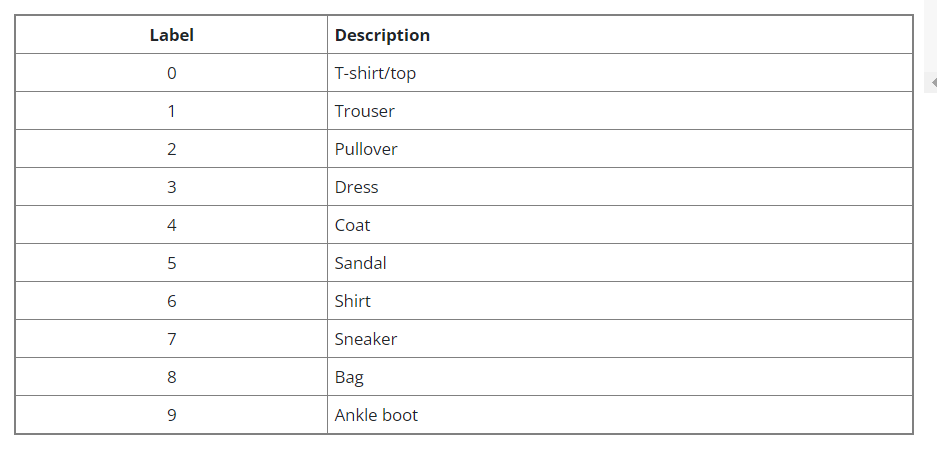

In [ ]:
len(train_image), len(test_image)

(60000, 10000)

In [ ]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
              'Shirt','Sneaker','Bag','Ankale boot']

print random samples from the dataset

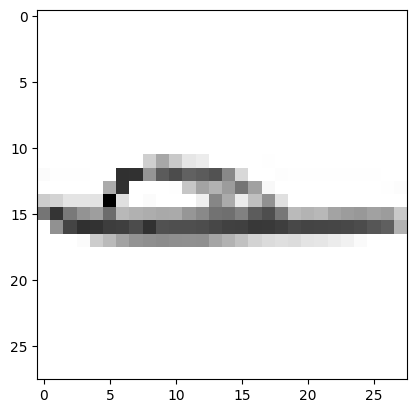

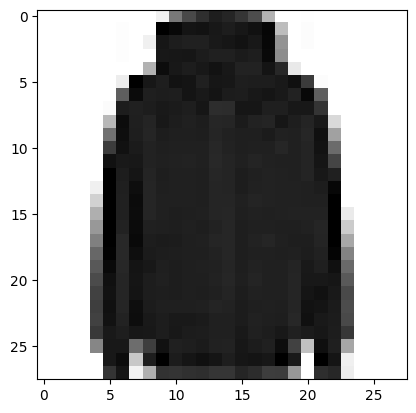

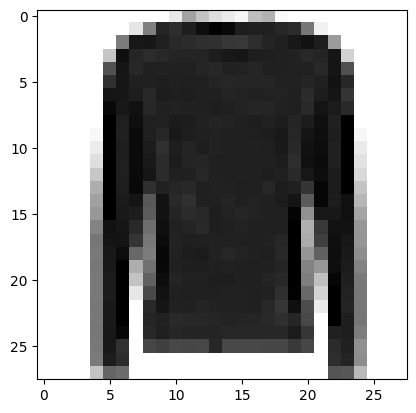

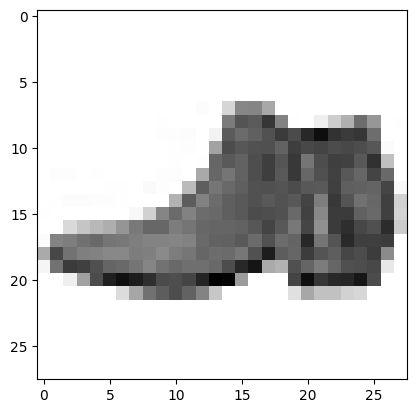

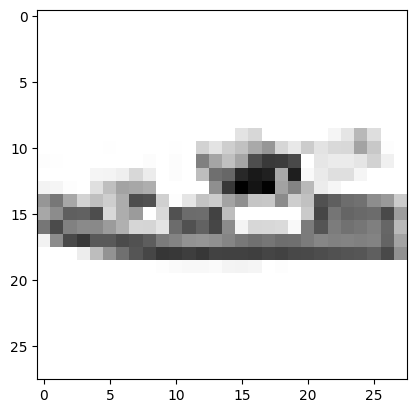

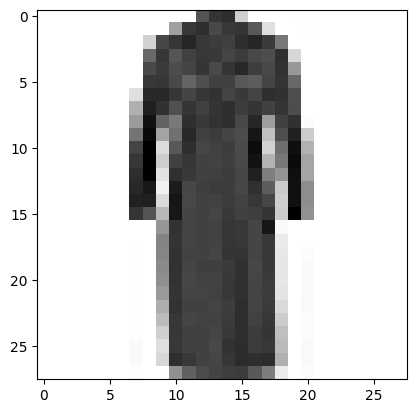

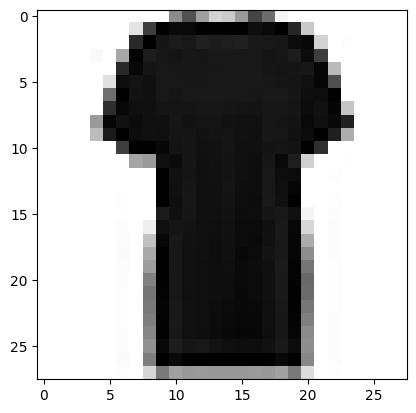

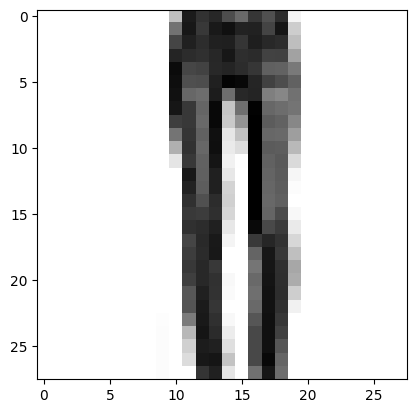

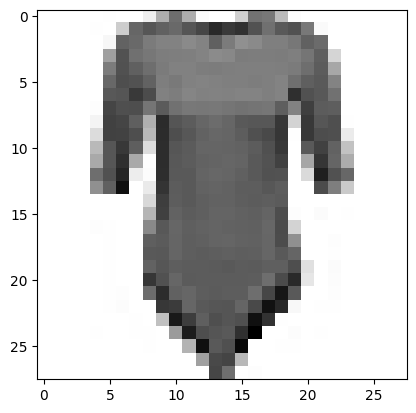

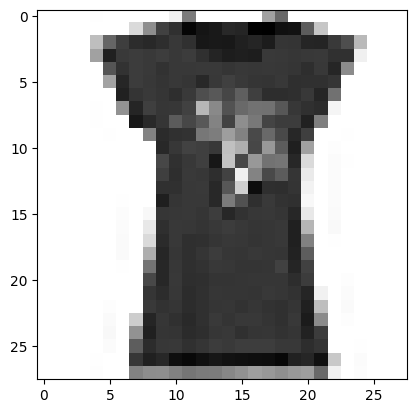

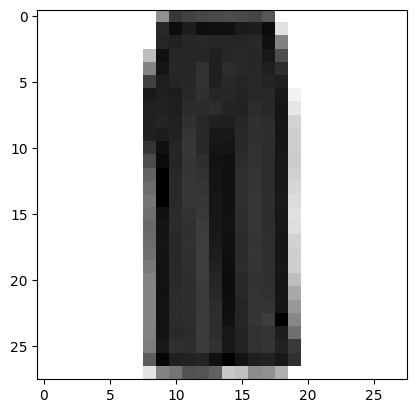

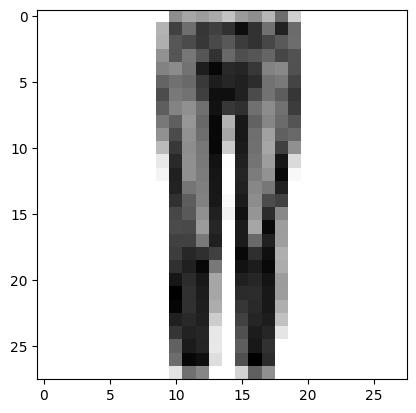

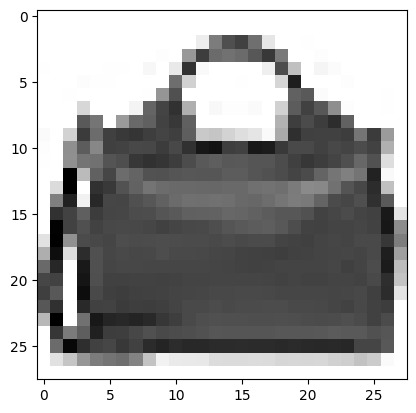

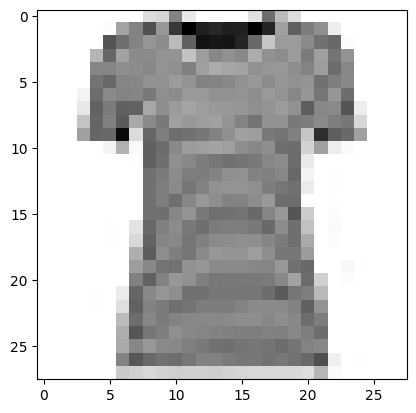

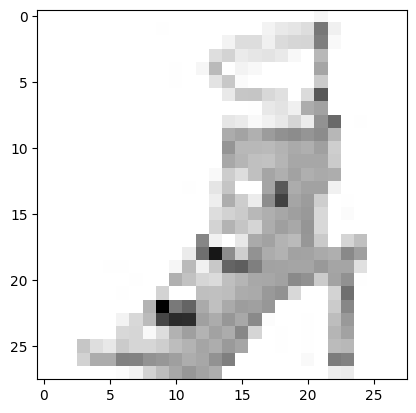

In [ ]:
for i in range(15):
  random_index = random.randint(0,60000-1)
  image = train_image[random_index]
  plt.imshow(image,cmap=plt.cm.binary)
  plt.show()

Normalize the dataset

In [ ]:
train_image = train_image / 255.0
test_image = test_image / 255.0

now if we looked into the data we will find each image represented by 28 row 28 cols. \
so the train_image variable is a numpy array inside of it there is another 60000 numpy arrays each one of size 28*28*1. \
in order to train this on NN model we need to Flatten the data which mean convrte each 28*28*1 numpy array into 784 list than feed this array into the model layer

In [ ]:
# Create the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

Using an optimizer in a neural network is a critical component of the training process. It plays a crucial role in updating the model's parameters (weights and biases) to minimize the loss function, which measures the disparity between the predicted output and the actual target values. Here are the primary reasons for using an optimizer in a neural network: \
* Parameter Update: Neural networks consist of many parameters (weights and biases) that need to be adjusted to make the model more accurate in its predictions. Optimizers determine how much to adjust each parameter in the right direction to reduce the loss.\
where Weight updata equition is : w_new = w_old - (learning_rate * drivative of w_old with) \
* Avoiding Local Minima: The loss landscape of neural networks is often highly complex, with many local minima. Optimizers are designed to navigate this landscape and escape from poor local minima to find the global minimum (or a near-optimal solution).

The Adam optimizer, short for Adaptive Moment Estimation, is a popular and widely used optimization algorithm in the training of neural networks. It is particularly effective for a wide range of deep learning tasks due to its adaptive learning rates and momentum-like features. Here's an overview of the key characteristics and components of the Adam optimizer: \
* Adaptive Learning Rates: One of the primary features of Adam is that it adapts the learning rate for each parameter during training. It computes individual learning rates for each parameter based on the historical gradient information, which helps the optimizer converge faster and more effectively.
* Momentum: Adam incorporates the concept of momentum, similar to techniques like SGD with momentum. It uses a moving average of past gradients to stabilize and accelerate convergence.

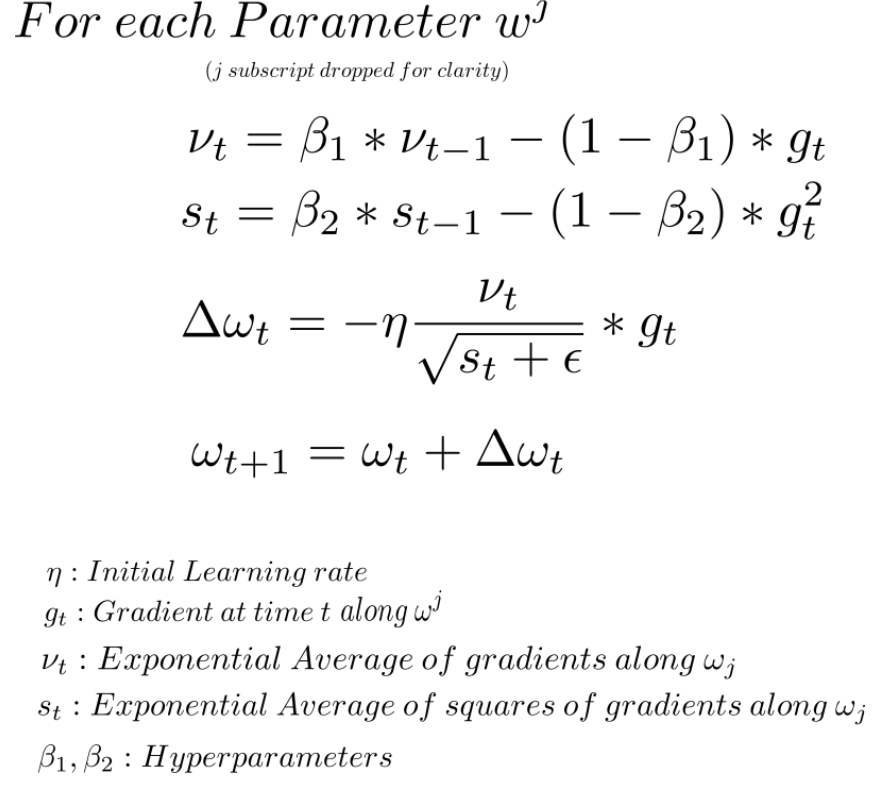

Sparse Categorical Cross-Entropy (Sparse CCE) is a loss function commonly used in the training of neural networks for classification tasks, particularly when the target labels are provided as integers representing the class indices

In [ ]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
model.fit(train_image,train_lable,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5020 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3362 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3127 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2939 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2803 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2562 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2464 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

In [ ]:
prediction = model.predict(test_image)

313/313 [==============================] - 1s 4ms/step


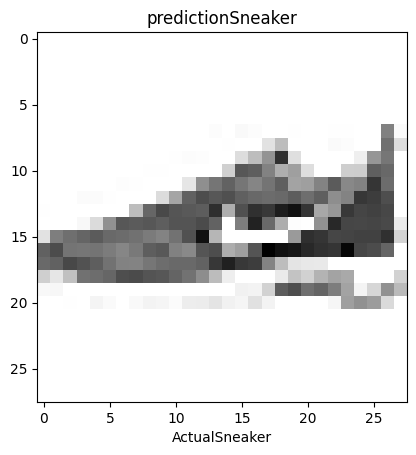

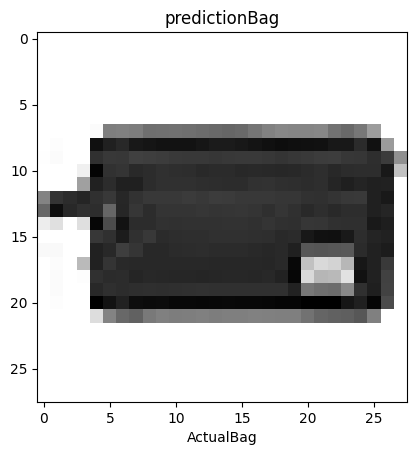

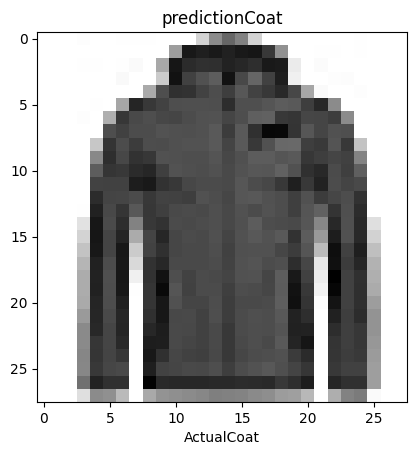

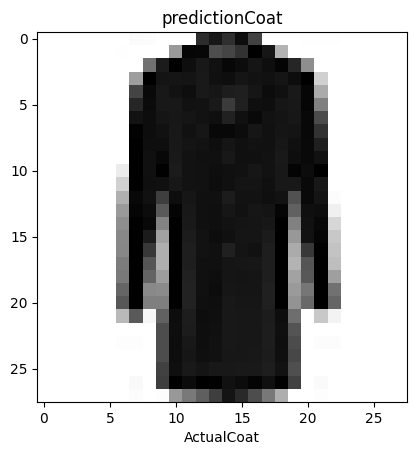

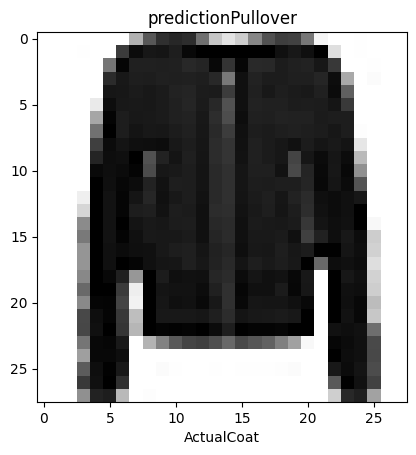

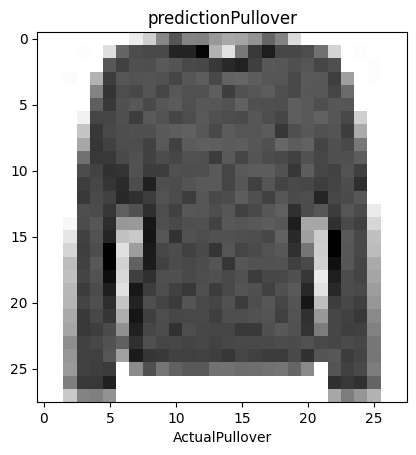

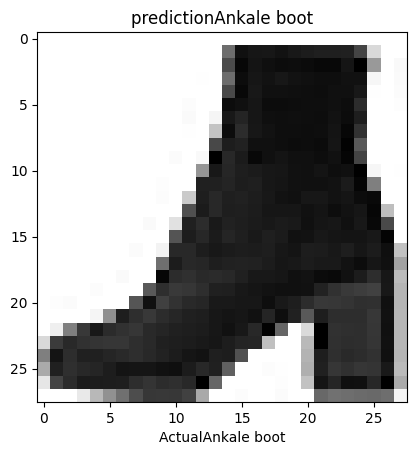

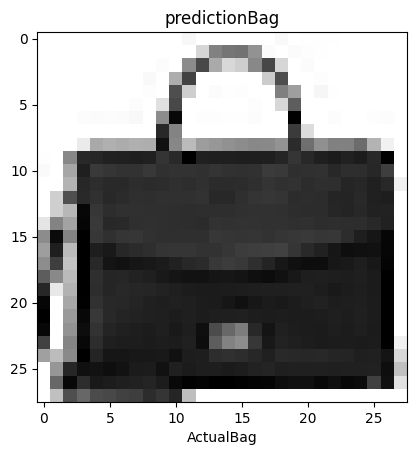

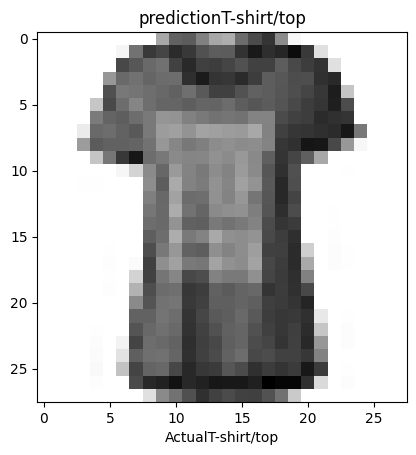

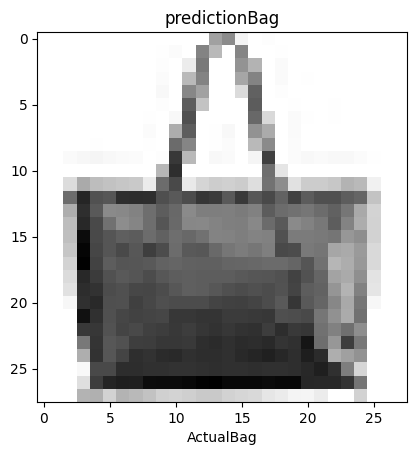

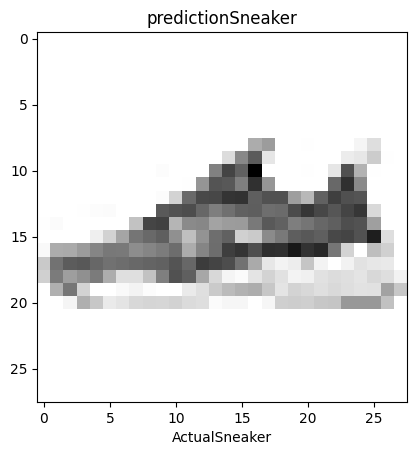

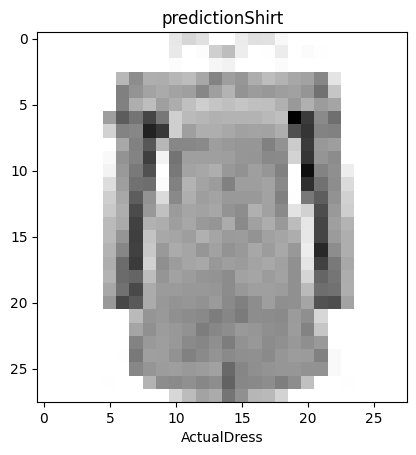

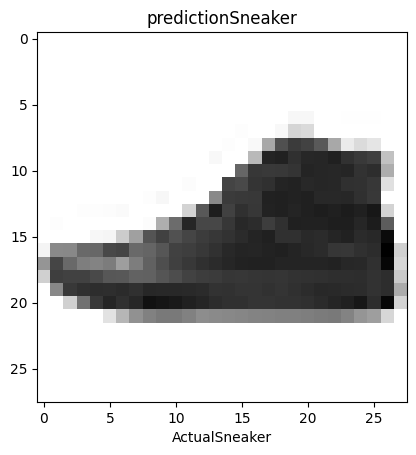

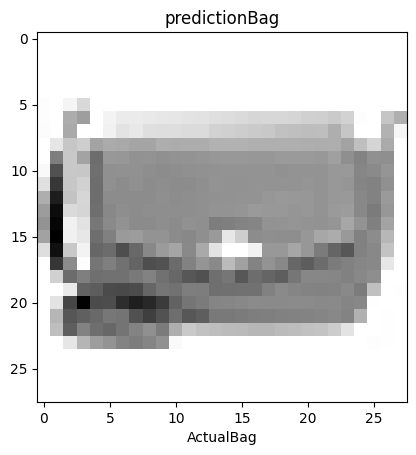

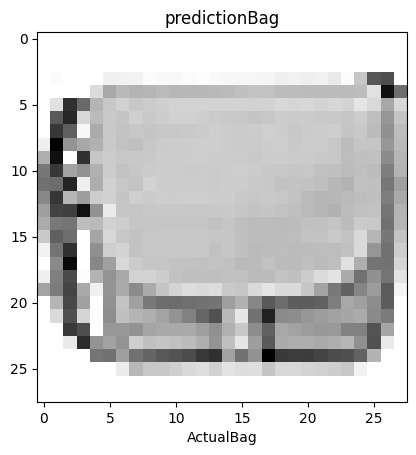

In [ ]:
for i in range(15):
  random_index = random.randint(0,10000-1)
  plt.grid(False)
  plt.imshow(test_image[random_index],cmap = plt.cm.binary)
  plt.xlabel("Actual" + class_name[test_lable[random_index]])
  plt.title("prediction" + class_name[np.argmax(prediction[random_index])])
  plt.show()

In [ ]:
model.save('Fashinmnist prediction model')